# **Decoding the neural activity of a visual task**

## First steps in decoding

In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
timesteps = np.arange(-.2, .4, .01)
B_thetas = np.linspace(np.pi/2, 0 , 8)/ 2.5
colors=plt.cm.inferno(np.linspace(.8, .2, len(B_thetas)))
cluster_all = np.load("C:\\Users\Alex\OneDrive\Bureau\STAGE-INT-CoNeCT\CODE\semaine2\Decoding_V2\cluster_list.npy",allow_pickle = True)
cluster=cluster_all
winsize=.1

In [96]:
Matrice_theta=np.load("C:\\Users\Alex\OneDrive\Bureau\STAGE-INT-CoNeCT\CODE\semaine2\Decoding_V2\Matrices_decoding_theta.npy")[0]
Scores_mean_theta=np.load("C:\\Users\Alex\OneDrive\Bureau\STAGE-INT-CoNeCT\CODE\semaine2\Decoding_V2\Scores_mean_decoding_theta_2.npy")[0]
Scores_sd_theta=np.load("C:\\Users\Alex\OneDrive\Bureau\STAGE-INT-CoNeCT\CODE\semaine2\Decoding_V2\Scores_sd_decoding_theta_2.npy")[0]

Matrice_btheta=np.load("C:\\Users\Alex\OneDrive\Bureau\STAGE-INT-CoNeCT\CODE\semaine2\Decoding_V2\Matrices_decoding_btheta.npy")[0][:,:,-1]
Scores_mean_btheta=np.load("C:\\Users\Alex\OneDrive\Bureau\STAGE-INT-CoNeCT\CODE\semaine2\Decoding_V2\Scores_mean_decoding_btheta.npy")[0][:,-1]
Scores_sd_btheta=np.load("C:\\Users\Alex\OneDrive\Bureau\STAGE-INT-CoNeCT\CODE\semaine2\Decoding_V2\Scores_sd_decoding_btheta.npy")[0][:,-1]

print(np.shape(Matrice_btheta),np.shape(Matrice_theta),np.shape(Scores_mean_btheta),np.shape(Scores_mean_theta),np.shape(Scores_sd_btheta),np.shape(Scores_sd_theta))

(8, 8) (12, 12, 8) (61,) (61, 8) (61,) (61, 8)


### Décoding the $\theta$ orientation for an increasing noise $B_\theta$.

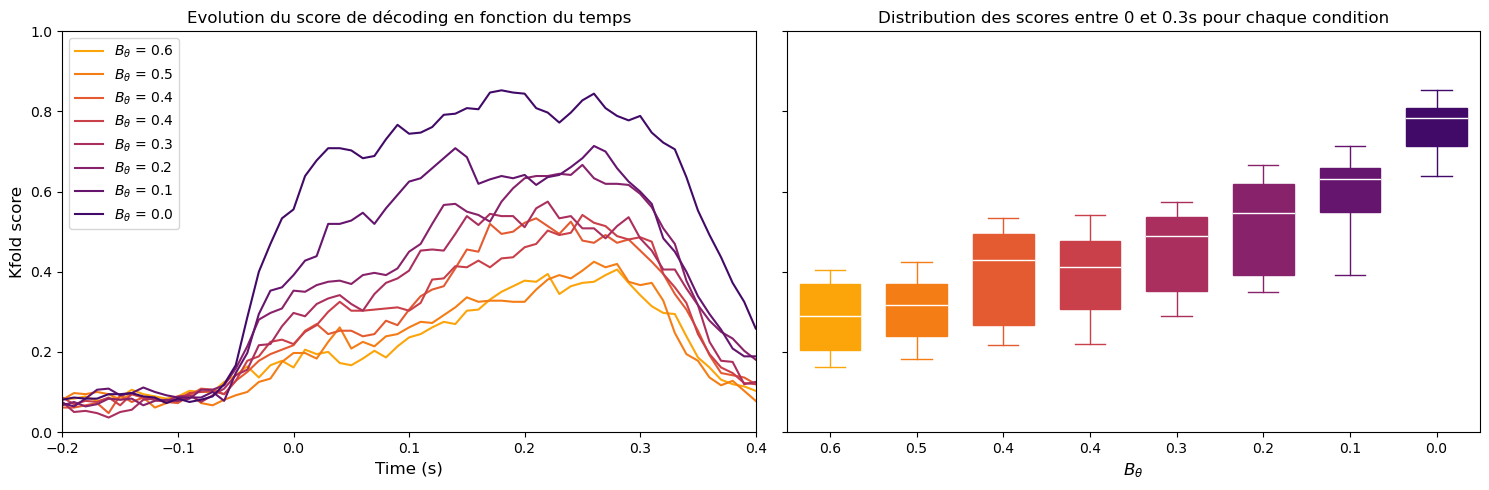

In [97]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
#ax[0].hlines(0.5,timesteps.min(),timesteps.max(),linestyle="--",color="red")
for i in range(len(B_thetas)):
    ax[0].plot(timesteps,Scores_mean_theta[:,i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],1)),color=colors[i])
    #ax[0].fill_between(timesteps,Scores_mean_theta[:,i]-Scores_sd_theta[:,i],Scores_mean_theta[:,i]+Scores_sd_theta[:,i],color=colors[i],label=r"$B_{\theta}$ = "+str(round(B_thetas[i],1)))
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

#ax[1].hlines(0.5,0,7,linestyle="--",color="red")
for i in range(len(B_thetas)):
    ax[1].boxplot(Scores_mean_theta[20:50,i],positions = [i],widths = 0.7, showmeans = False,showfliers = False,
                  patch_artist=True, boxprops=dict(facecolor=colors[i], color=colors[i]),
                  capprops=dict(color=colors[i]), whiskerprops=dict(color=colors[i]),
                  flierprops=dict(color=colors[i], markeredgecolor=colors[i]),
                  medianprops=dict(color='white'))
    
ax[1].set_xticklabels([round(B_thetas[i],1) for i in range(len(B_thetas))])
ax[1].set_xlabel(r"$B_{\theta}$",size=12)
ax[1].set_title("Distribution des scores entre 0 et 0.3s pour chaque condition",size=12)

plt.tight_layout()
plt.show()

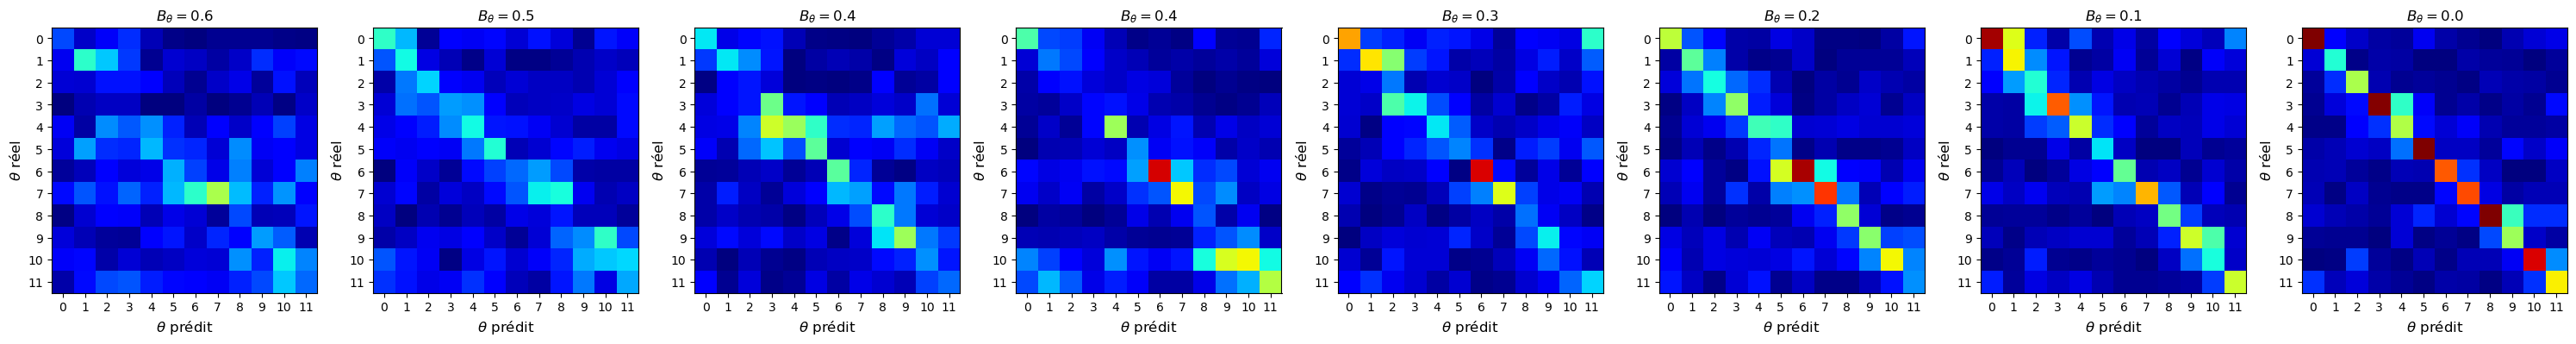

In [98]:
fig,ax=plt.subplots(1,8,figsize=(30,5))
for i in range(len(B_thetas)):
    graph=ax[i].imshow(Matrice_theta[:,:,i],vmin=0,vmax=3,cmap="jet")
    ax[i].set_title(r"$B_{\theta} = $"+str(round(B_thetas[i],1)),size=12)
    ax[i].set_xlabel(r"$\theta$ prédit",size=12)
    ax[i].set_ylabel(r"$\theta$ réel",size=12)
    ax[i].set_xticks(range(0,12))
    ax[i].set_yticks(range(0,12))
#fig.colorbar(graph,ax=ax[7])
plt.tight_layout()
plt.show()

### Decoding the noise $B_\theta$ from différents orientations activity $\theta$

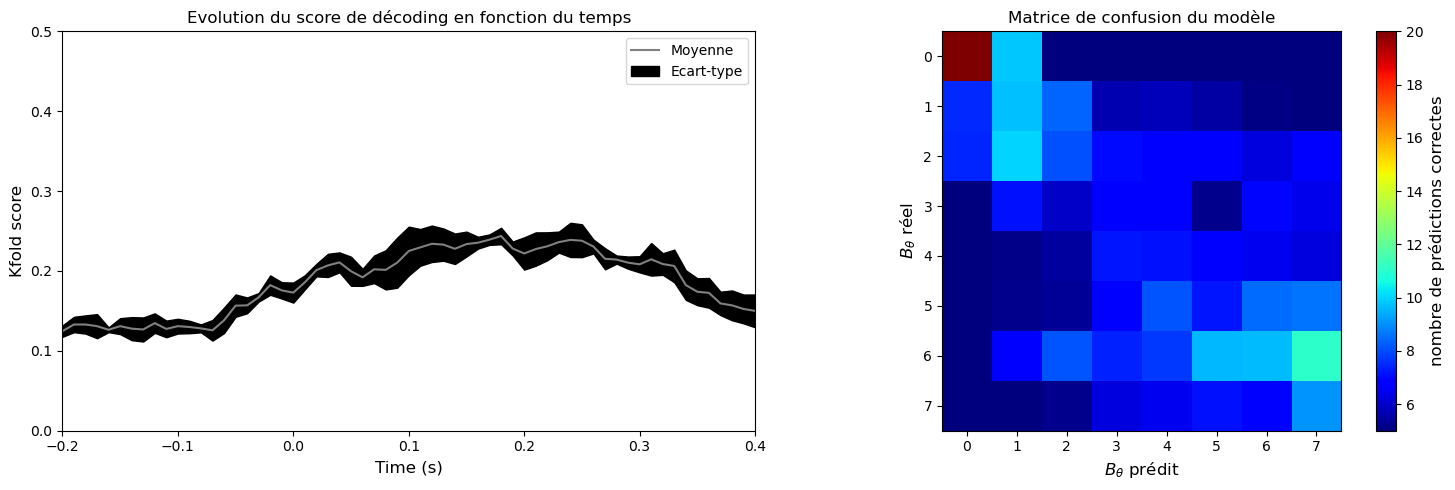

In [123]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
#fig.set_dpi(1400)
ax[0].plot(timesteps,Scores_mean_btheta,color="grey",label="Moyenne")
ax[0].fill_between(timesteps,Scores_mean_btheta-Scores_sd_btheta,Scores_mean_btheta+Scores_sd_btheta,label="Ecart-type",color="black")
ax[0].set_xlim(timesteps.min(),timesteps.max())
ax[0].set_ylim(0,0.5)
ax[0].set_xlabel("Time (s)",size=12)
ax[0].set_ylabel("Kfold score",size=12)
ax[0].set_title("Evolution du score de décoding en fonction du temps",size=12)
ax[0].legend()

graph=ax[1].imshow(Matrice_btheta,cmap="jet",vmin=5,vmax=20)
ax[1].set_xlabel(r"$B_\theta$ prédit",size=12)
ax[1].set_ylabel(r"$B_\theta$ réel",size=12)
ax[1].set_title("Matrice de confusion du modèle")
cbar=fig.colorbar(graph,ax=ax[1])
cbar.set_label("nombre de prédictions correctes",size=12)
plt.tight_layout()
plt.show()

## Improve the decoding with the equalization histogram method